## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Variables

In [3]:
main_path = 'Google_Mobility/'
out_dir = 'Google_Mobility/Google_Mobility_LATAM/'

## Read global mobility
* Source: https://www.google.com/covid19/mobility/

In [4]:
# Read golbal mobility
golbal_mobility_df = pd.read_csv(main_path + 'Global_Mobility_Report.csv')
# Drop unnecessary columns:
golbal_mobility_df.drop(columns=['metro_area', 'census_fips_code', 'place_id', 'iso_3166_2_code', 'sub_region_1', 'sub_region_2'], inplace=True)
golbal_mobility_df.head(5)

,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


## Filter by country

In [5]:
# function to rename the columns of the dataframe
def rename_columns(df, country):
    for column in df.columns.values:
        if column == 'date':
            continue
        else:
            new_column_name = column + '_' + country
            df.rename(columns = {column:new_column_name}, inplace = True)

In [6]:
# Function to get dataframe of a given country
def get_country_df(df, country_name, country_code):
    df = df[df['country_region_code'] == country_code]
    # Convert string to datetime format
    df['date'] = pd.to_datetime(df['date'])
    # Group by date:
    df = df.groupby([df['date'].dt.date]).mean()
    # Rename columns:
    rename_columns(df, country_name)
    df = df.reset_index()
    return df

In [7]:
def save_df_as_csv(df, country_name):
    df.to_csv(out_dir + f"{country_name}.csv", index=False)

In [8]:
def get_latam_df(countries_latam_dict, golbal_mobility, save=False):
    latam_df = pd.DataFrame()
    flag = True
    for country_name, country_code in countries_latam_dict.items():
        df = get_country_df(golbal_mobility, country_name, country_code)
        if save:
            save_df_as_csv(df, country_name)
        if flag:
            latam_df = df
            flag = False
        else:
            latam_df = pd.merge(latam_df, df, how="left", on=["date"])
    return latam_df

In [9]:
# Dictionary with country names and codes:
countries_latam = {'Antigua and Barbuda':'AG', 'Argentina':'AR', 'Bahamas': 'BS', 'Barbados':'BB', 'Belize':'BZ', 
                   'Bolivia':'BO', 'Brazil':'BR', 'Chile':'CL', 'Colombia':'CO', 'Costa Rica':'CR', 'Cuba':'CU', 
                   'Dominica':'DM', 'Dominican Republic':'DO', 'Ecuador':'EC', 'El Salvador':'SV', 'Grenada':'GD', 
                   'Guatemala':'GT', 'Guyana':'GY', 'Haiti':'HT', 'Honduras':'HN', 'Jamaica':'JM', 'Mexico':'MX', 
                   'Nicaragua':'NI', 'Panama':'PA', 'Paraguay':'PY', 'Peru':'PE', 'Saint Lucia':'LC',
                   'Saint Vincent and the Grenadines':'VC', 'Suriname':'SR', 'Trinidad and Tobago':'TT', 
                   'Uruguay':'UY', 'Venezuela':'VE'}

In [10]:
# Generate the dataframe of mobility in latam based on the dictionary
latam_df = get_latam_df(countries_latam, golbal_mobility_df, True)
latam_df

,date,retail_and_recreation_percent_change_from_baseline_Antigua and Barbuda,grocery_and_pharmacy_percent_change_from_baseline_Antigua and Barbuda,parks_percent_change_from_baseline_Antigua and Barbuda,transit_stations_percent_change_from_baseline_Antigua and Barbuda,workplaces_percent_change_from_baseline_Antigua and Barbuda,residential_percent_change_from_baseline_Antigua and Barbuda,retail_and_recreation_percent_change_from_baseline_Argentina,grocery_and_pharmacy_percent_change_from_baseline_Argentina,parks_percent_change_from_baseline_Argentina,...,parks_percent_change_from_baseline_Uruguay,transit_stations_percent_change_from_baseline_Uruguay,workplaces_percent_change_from_baseline_Uruguay,residential_percent_change_from_baseline_Uruguay,retail_and_recreation_percent_change_from_baseline_Venezuela,grocery_and_pharmacy_percent_change_from_baseline_Venezuela,parks_percent_change_from_baseline_Venezuela,transit_stations_percent_change_from_baseline_Venezuela,workplaces_percent_change_from_baseline_Venezuela,residential_percent_change_from_baseline_Venezuela
0,2020-02-15,-5.5,-0.5,-5.0,1.333333,-0.500000,3.0,-0.660436,-2.574324,-2.493573,...,-0.476190,4.384615,2.333333,-0.100000,8.0,2.0,3.0,2.0,5.0,-1.0
1,2020-02-16,-7.5,-1.0,-1.5,0.500000,0.500000,NaN,-6.285714,-5.429864,-12.264103,...,-11.333333,-0.692308,-1.900000,0.833333,5.0,2.0,1.0,1.0,3.0,0.0
2,2020-02-17,-0.5,-2.0,1.0,-5.333333,0.500000,3.0,-8.941781,-6.601307,-18.907104,...,-20.600000,-3.071429,7.047619,1.200000,6.0,3.0,4.0,3.0,10.0,-1.0
3,2020-02-18,-2.0,-5.5,5.5,2.333333,4.500000,1.0,-1.053872,0.276667,-7.495935,...,-15.550000,1.538462,8.190476,0.812500,3.0,0.0,0.0,1.0,6.0,-1.0
4,2020-02-19,-2.5,-1.0,0.5,1.666667,2.000000,1.0,-0.411960,-1.088816,1.931319,...,-0.684211,3.153846,9.619048,-0.750000,5.0,0.0,4.0,4.0,5.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2022-05-09,35.5,32.0,132.0,-15.666667,-0.666667,6.0,12.027778,42.529010,-13.626741,...,-24.526316,-7.200000,45.714286,0.631579,31.0,67.0,37.0,-5.0,37.0,11.0
809,2022-05-10,30.5,32.0,114.0,-16.666667,6.500000,7.0,13.693662,44.843750,-14.508152,...,-27.750000,-10.285714,44.714286,1.473684,34.0,71.0,36.0,-6.0,37.0,12.0
810,2022-05-11,34.5,32.0,111.0,-21.666667,3.500000,7.0,12.069444,41.749153,-12.983193,...,-28.300000,-11.933333,44.380952,0.894737,37.0,72.0,41.0,-3.0,37.0,12.0
811,2022-05-12,37.5,30.5,114.5,-14.000000,-1.333333,7.0,8.796610,37.340136,-16.603217,...,-24.000000,-10.933333,41.857143,0.950000,36.0,70.0,41.0,-5.0,39.0,11.0


### impute data in columns with low missing values

In [11]:
# Get columns with na values and number of na values
na_columns = latam_df.isna().sum()[latam_df.isna().sum()>0]

for column_name, value in na_columns.items():
    if value < len(latam_df)/4:
        latam_df[column_name].fillna((latam_df[column_name].mean()), inplace=True)

retail_and_recreation_percent_change_from_baseline_Cuba                                813
grocery_and_pharmacy_percent_change_from_baseline_Cuba                                 813
parks_percent_change_from_baseline_Cuba                                                813
transit_stations_percent_change_from_baseline_Cuba                                     813
workplaces_percent_change_from_baseline_Cuba                                           813
residential_percent_change_from_baseline_Cuba                                          813
retail_and_recreation_percent_change_from_baseline_Dominica                            813
grocery_and_pharmacy_percent_change_from_baseline_Dominica                             813
parks_percent_change_from_baseline_Dominica                                            813
transit_stations_percent_change_from_baseline_Dominica                                 813
workplaces_percent_change_from_baseline_Dominica                                       813

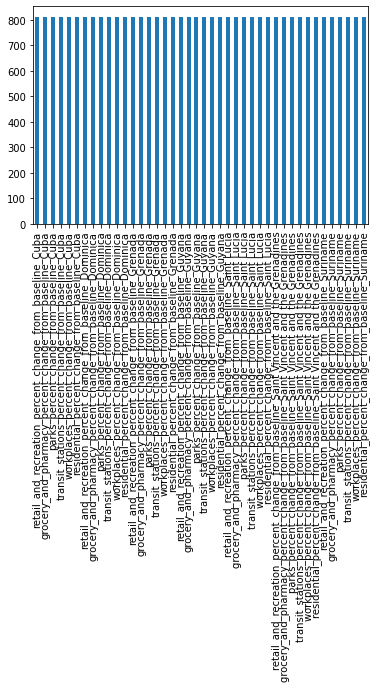

In [12]:
# Null values
latam_df.isna().sum()[latam_df.isna().sum()>10].plot(kind='bar')
latam_df.isna().sum()[latam_df.isna().sum()>0]

### see wich countries doesn't have data of mobility:

In [13]:
def get_country_name(column_name):
    country_name = column_name.split('_')[-1]
    return country_name

In [14]:
def get_countries_without_mobility(na_columns):
    countries_without_mobility = []
    for column_name, value in na_columns.items():
        country_name = get_country_name(column_name)
        countries_without_mobility.append(country_name)

    countries_without_mobility = set(countries_without_mobility)
    return countries_without_mobility

In [15]:
# Get columns with na values and number of na values
na_columns = latam_df.isna().sum()[latam_df.isna().sum()>0]

countries_without_mobility = get_countries_without_mobility(na_columns)

for country in countries_without_mobility:
    print(f"{country} doesn't have data about mobility")

Cuba doesn't have data about mobility
Grenada doesn't have data about mobility
Saint Vincent and the Grenadines doesn't have data about mobility
Saint Lucia doesn't have data about mobility
Guyana doesn't have data about mobility
Suriname doesn't have data about mobility
Dominica doesn't have data about mobility


# Generate csv file for mobility in latam

In [16]:
latam_df.to_csv(out_dir + "google_mobility_data_latam.csv", index=False)

## Read the csv file

In [17]:
pd.read_csv(out_dir + "google_mobility_data_latam.csv")

,date,retail_and_recreation_percent_change_from_baseline_Antigua and Barbuda,grocery_and_pharmacy_percent_change_from_baseline_Antigua and Barbuda,parks_percent_change_from_baseline_Antigua and Barbuda,transit_stations_percent_change_from_baseline_Antigua and Barbuda,workplaces_percent_change_from_baseline_Antigua and Barbuda,residential_percent_change_from_baseline_Antigua and Barbuda,retail_and_recreation_percent_change_from_baseline_Argentina,grocery_and_pharmacy_percent_change_from_baseline_Argentina,parks_percent_change_from_baseline_Argentina,...,parks_percent_change_from_baseline_Uruguay,transit_stations_percent_change_from_baseline_Uruguay,workplaces_percent_change_from_baseline_Uruguay,residential_percent_change_from_baseline_Uruguay,retail_and_recreation_percent_change_from_baseline_Venezuela,grocery_and_pharmacy_percent_change_from_baseline_Venezuela,parks_percent_change_from_baseline_Venezuela,transit_stations_percent_change_from_baseline_Venezuela,workplaces_percent_change_from_baseline_Venezuela,residential_percent_change_from_baseline_Venezuela
0,2020-02-15,-5.5,-0.5,-5.0,1.333333,-0.500000,3.00000,-0.660436,-2.574324,-2.493573,...,-0.476190,4.384615,2.333333,-0.100000,8.0,2.0,3.0,2.0,5.0,-1.0
1,2020-02-16,-7.5,-1.0,-1.5,0.500000,0.500000,1.47832,-6.285714,-5.429864,-12.264103,...,-11.333333,-0.692308,-1.900000,0.833333,5.0,2.0,1.0,1.0,3.0,0.0
2,2020-02-17,-0.5,-2.0,1.0,-5.333333,0.500000,3.00000,-8.941781,-6.601307,-18.907104,...,-20.600000,-3.071429,7.047619,1.200000,6.0,3.0,4.0,3.0,10.0,-1.0
3,2020-02-18,-2.0,-5.5,5.5,2.333333,4.500000,1.00000,-1.053872,0.276667,-7.495935,...,-15.550000,1.538462,8.190476,0.812500,3.0,0.0,0.0,1.0,6.0,-1.0
4,2020-02-19,-2.5,-1.0,0.5,1.666667,2.000000,1.00000,-0.411960,-1.088816,1.931319,...,-0.684211,3.153846,9.619048,-0.750000,5.0,0.0,4.0,4.0,5.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2022-05-09,35.5,32.0,132.0,-15.666667,-0.666667,6.00000,12.027778,42.529010,-13.626741,...,-24.526316,-7.200000,45.714286,0.631579,31.0,67.0,37.0,-5.0,37.0,11.0
809,2022-05-10,30.5,32.0,114.0,-16.666667,6.500000,7.00000,13.693662,44.843750,-14.508152,...,-27.750000,-10.285714,44.714286,1.473684,34.0,71.0,36.0,-6.0,37.0,12.0
810,2022-05-11,34.5,32.0,111.0,-21.666667,3.500000,7.00000,12.069444,41.749153,-12.983193,...,-28.300000,-11.933333,44.380952,0.894737,37.0,72.0,41.0,-3.0,37.0,12.0
811,2022-05-12,37.5,30.5,114.5,-14.000000,-1.333333,7.00000,8.796610,37.340136,-16.603217,...,-24.000000,-10.933333,41.857143,0.950000,36.0,70.0,41.0,-5.0,39.0,11.0
